In [6]:
from AppalachianRL.envs.trail import AppalachianTrailEnv


env = AppalachianTrailEnv()

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, trunc, info = env.step(action)
    env.render()


Day 1: 197.0 miles left | Energy 80.0 | Food 9.5 | Weather 0
Day 2: 196.0 miles left | Energy 70.0 | Food 9.3 | Weather 0
Day 3: 196.0 miles left | Energy 90.0 | Food 8.3 | Weather 0
Day 4: 195.0 miles left | Energy 80.0 | Food 8.1 | Weather 0
Day 5: 195.0 miles left | Energy 90.0 | Food 8.1 | Weather 0
Day 6: 195.0 miles left | Energy 100.0 | Food 8.1 | Weather 0
Day 7: 190.0 miles left | Energy 65.0 | Food 7.3 | Weather 0
Day 8: 190.0 miles left | Energy 75.0 | Food 7.3 | Weather 0
Day 9: 190.0 miles left | Energy 95.0 | Food 6.3 | Weather 0
Day 10: 187.0 miles left | Energy 75.0 | Food 5.8 | Weather 0
Day 11: 187.0 miles left | Energy 95.0 | Food 4.8 | Weather 0
Day 12: 186.0 miles left | Energy 83.0 | Food 4.6 | Weather 1
Day 13: 186.0 miles left | Energy 93.0 | Food 4.6 | Weather 0
Day 14: 185.0 miles left | Energy 81.0 | Food 4.4 | Weather 1
Day 15: 180.0 miles left | Energy 46.0 | Food 3.6 | Weather 0
Day 16: 179.0 miles left | Energy 36.0 | Food 3.4 | Weather 0
Day 17: 178.0 mi


Training Q-Learning...
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran out of energy!
Failure: You ran

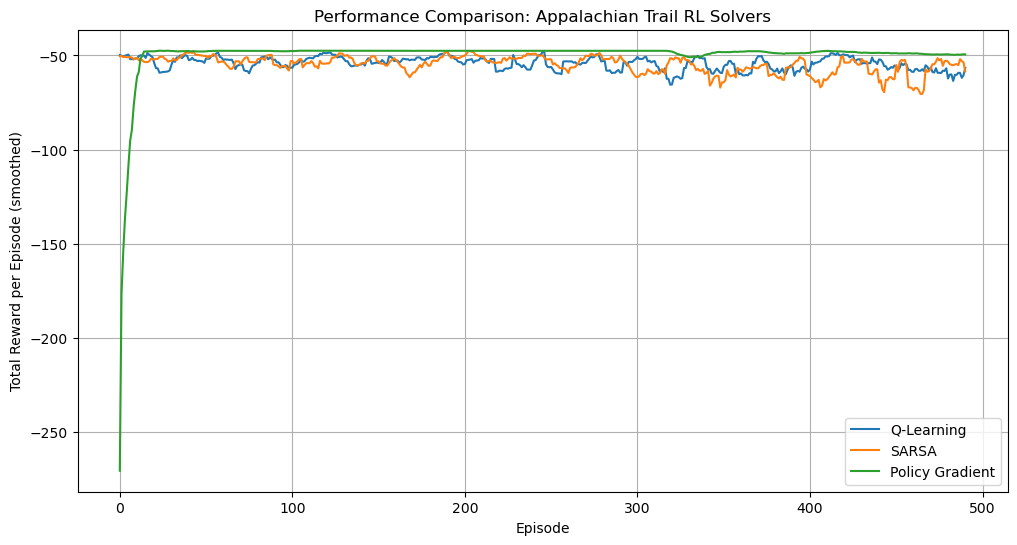

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from AppalachianRL.envs.trail import AppalachianTrailEnv
from AppalachianRL.solvers.q_learning import QLearningSolver
from AppalachianRL.solvers.sarsa import SarsaSolver
from AppalachianRL.solvers.policy_gradient import PolicyGradientSolver

# ---------------------------
# Experiment Parameters
# ---------------------------
EPISODES = 500      # number of training episodes for each solver
SEED = 2025

# ---------------------------
# Initialize environment
# ---------------------------
# env = AppalachianTrailEnv(seed=SEED)
env = AppalachianTrailEnv(trail_length=50, max_energy=100, max_food=10)

# ---------------------------
# Initialize solvers
# ---------------------------
solvers = {
    "Q-Learning": QLearningSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "SARSA": SarsaSolver(env, learning_rate=0.1, gamma=0.99, epsilon=0.2, seed=SEED),
    "Policy Gradient": PolicyGradientSolver(env, lr=1e-3, gamma=0.99, seed=SEED)
}

# ---------------------------
# Train each solver and collect rewards
# ---------------------------
all_rewards = {}

for name, solver in solvers.items():
    print(f"\nTraining {name}...")
    rewards = solver.train(episodes=EPISODES)
    all_rewards[name] = rewards

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(12, 6))
for name, rewards in all_rewards.items():
    smoothed = np.convolve(rewards, np.ones(10)/10, mode='valid')
    plt.plot(smoothed, label=name)

plt.title("Performance Comparison: Appalachian Trail RL Solvers")
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode (smoothed)")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
resupply_points = [round(item) for item in pd.read_csv("data/resupply_points.csv")['mile'].tolist()]


current_mile = 54

next_resupply = min(
    [p for p in resupply_points if p > current_mile],
    default=None
)

next_resupply

70